In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv
/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv


In [2]:
df = pd.read_csv("/kaggle/input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv")
df.head(5)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
print(plt.style.available )

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [5]:
plt.style.use('ggplot')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x, y = df.loc[:, df.columns != 'class'], df.loc[:,'class']
knn.fit(x,y)
prediction = knn.predict(x)
print("Prediction: {}".format(prediction))

Prediction: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Ab

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = df.loc[:, df.columns != 'class'], df.loc[:, 'class']
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("K-3", knn.score(x_test, y_test))

K-3 0.8602150537634409


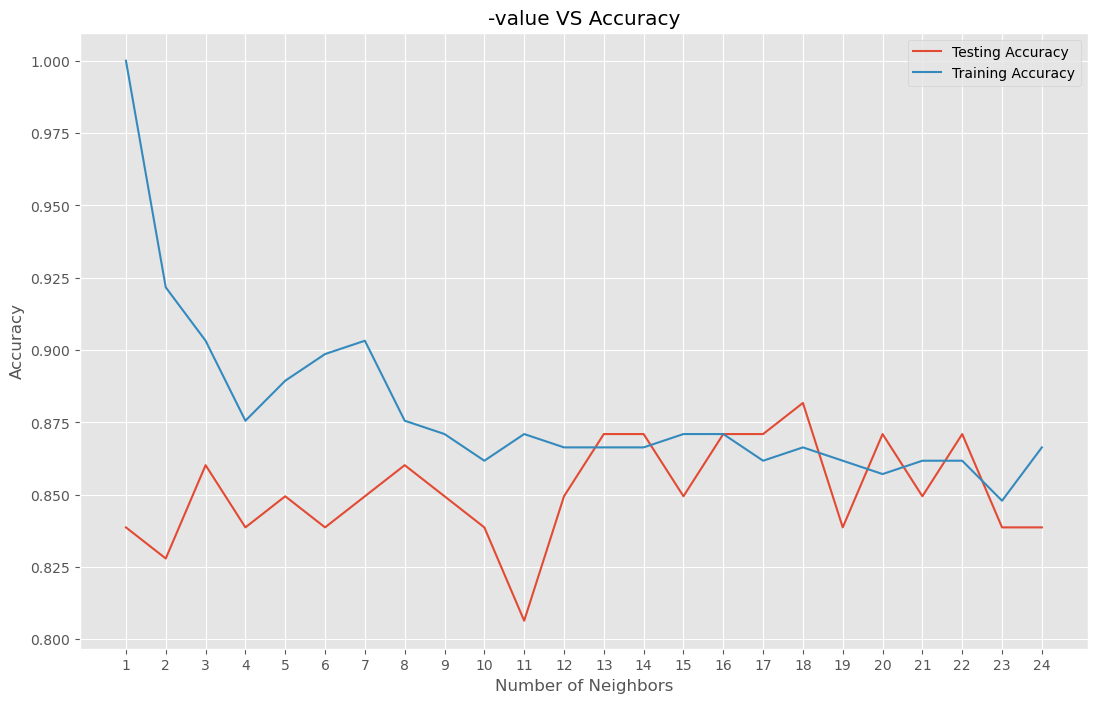

Best accuracy is 0.8817204301075269 with K = 18
best accuracy is 0.8817204301075269 with k = 18 


In [9]:
neigh = np.arange(1,25)
train_accuracy = []
test_accuracy = []
# loop over different values of k
for i, k in enumerate(neigh):
    # k from 1 t0 25
    knn = KNeighborsClassifier(n_neighbors = k)
    # fitt with the knn
    knn.fit(x_train, y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    #test accuracy
    test_accuracy.append(knn.score(x_test, y_test))
    

# Plot
plt.figure(figsize=[13,8])
plt.plot(neigh, test_accuracy, label = 'Testing Accuracy')
plt.plot(neigh, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neigh)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))
print("best accuracy is {} with k = {} ".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

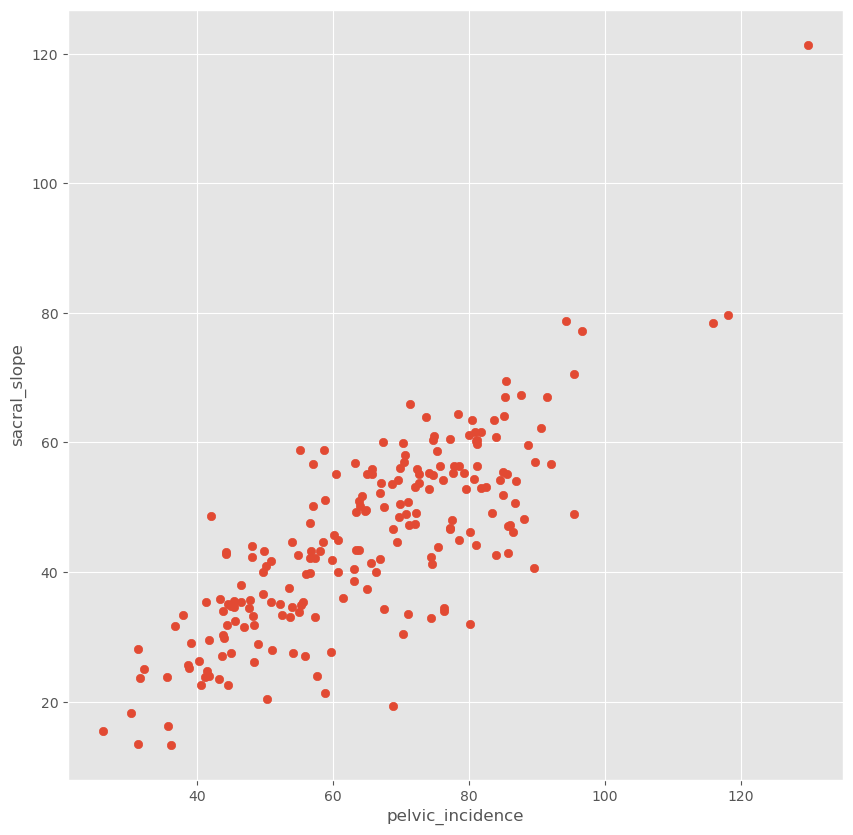

In [10]:
# create df1 that includes pelvic_incidence that is features and sacral_slope that is target variable

df1 = df[df['class'] =='Abnormal']
x = np.array(df1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(df1.loc[:, 'sacral_slope']).reshape(-1,1)
# scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x, y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

R^2 score:  0.6458410481075871


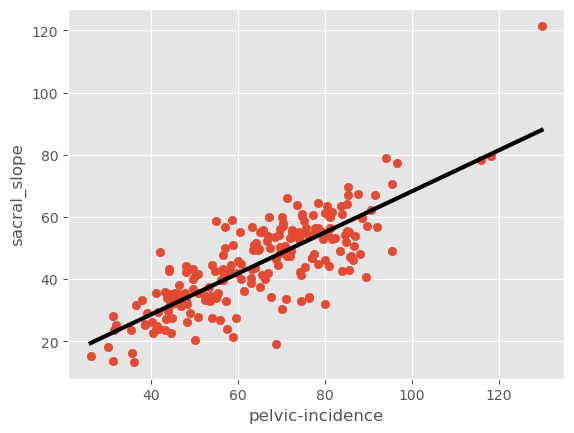

In [11]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
#predict space 
predict_space = np.linspace(min(x),max(x)).reshape(-1,1)
#fit
reg.fit(x,y)
# predict
predicted = reg.predict(predict_space)
#R^2
print('R^2 score: ',reg.score(x,y))
# plot regression line and scatter
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic-incidence')
plt.ylabel('sacral_slope')
plt.show()

In [12]:
# cross validation
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg, x,y, cv=k)
print('CV Scores',cv_result)
print('CV scores average',np.sum(cv_result)/k)

CV Scores [0.32924233 0.61683991 0.53117056 0.1954798  0.29299864]
CV scores average 0.3931462502884869


In [13]:
# Ridge
from sklearn.linear_model import Ridge
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=2, test_size=0.3)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train, y_train)
ridge_predict = ridge.predict(x_test)
print("Ridge score", ridge.score(x_test,y_test))

Ridge score 0.5608287918841997


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [14]:
# Lasso
from sklearn.linear_model import Lasso
x = np.array(df1.loc[:,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','pelvic_radius']])
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)

Lasso score:  0.9640334804327547
Lasso coefficients:  [ 0.82498243 -0.7209057   0.         -0.        ]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


In [15]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

x, y = df.loc[:, df.columns != 'class'], df.loc[:, 'class']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix: \n", cm)
print("Classification report: \n", classification_report(y_test, y_pred))

Confusion matrix: 
 [[60  6]
 [ 8 19]]
Classification report: 
               precision    recall  f1-score   support

    Abnormal       0.88      0.91      0.90        66
      Normal       0.76      0.70      0.73        27

    accuracy                           0.85        93
   macro avg       0.82      0.81      0.81        93
weighted avg       0.85      0.85      0.85        93



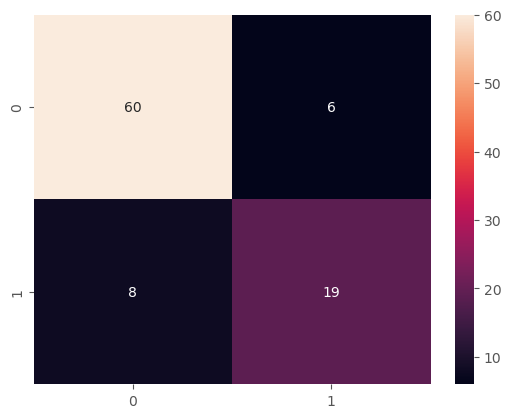

In [16]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

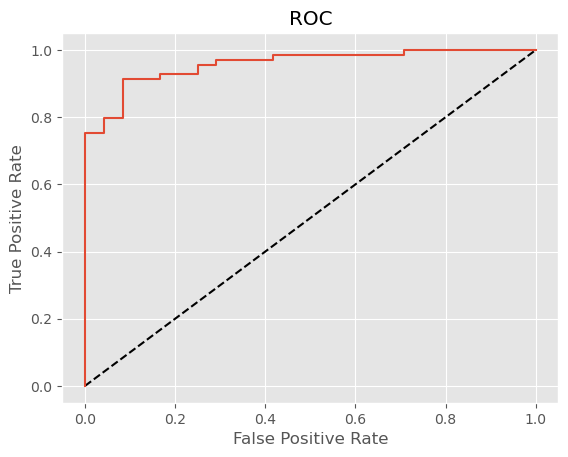

In [17]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# abnormal = 1 and normal = 0
df['class_binary'] = [1 if i == 'Abnormal' else 0 for i in df.loc[:,'class']]
x,y = df.loc[:,(df.columns != 'class') & (df.columns != 'class_binary')], df.loc[:,'class_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [18]:
#grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn_cv = GridSearchCV(knn, grid, cv=3)
knn_cv.fit(x,y)

# print the hyperparameter
print("Tuned hypyerparameter: {}".format(knn_cv.best_params_))
print("Best score: {}".format(knn_cv.best_score_))

Tuned hypyerparameter: {'n_neighbors': 4}
Best score: 0.7559434901667911


In [19]:
# grid search cross validation with 2 hyperparameter
# 1. hyperparameter is C:logistic regression regularization parameter
# 2. penalty l1 or l2
# Hyperparameter grid
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 12)
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(x_train,y_train)

# Print the optimal parameters and best score
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))   

Tuned hyperparameters : {'C': 0.001, 'penalty': 'l2'}
Best Accuracy: 0.8572425164890919


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

In [20]:
data = pd.get_dummies(df)
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_binary,class_Abnormal,class_Normal
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1,1,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1,1,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1,1,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1,1,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1,1,0


In [21]:
data.drop("class_Normal", axis= 1, inplace =True)
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_binary,class_Abnormal
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1,1


In [22]:
# SVM, pre-process and pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 1)
cv = GridSearchCV(pipeline,param_grid=parameters,cv=3)
cv.fit(x_train,y_train)

y_pred = cv.predict(x_test)

print("Accuracy: {}".format(cv.score(x_test, y_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8548387096774194
Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


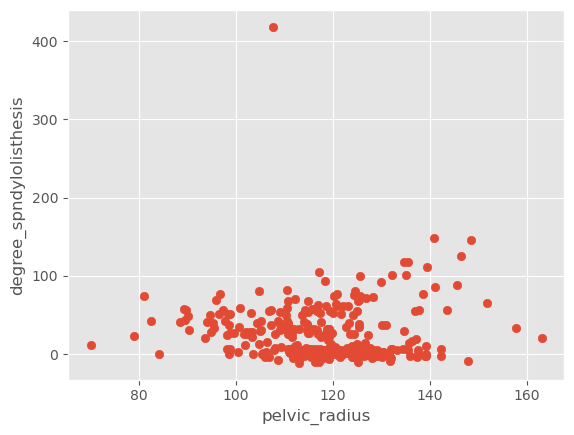

In [23]:
plt.scatter(data['pelvic_radius'], data['degree_spondylolisthesis'])
plt.xlabel('pelvic_radius')
plt.ylabel("degree_spndylolisthesis")
plt.show()

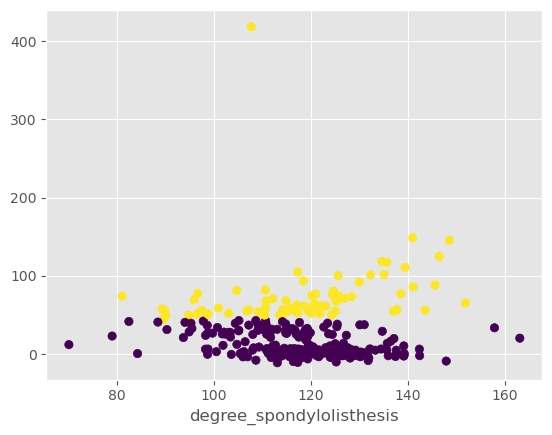

In [24]:
data2 = data.loc[:, ['degree_spondylolisthesis','pelvic_radius']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'],c = labels)
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

In [25]:
# cross tabulation table
df = pd.DataFrame({'labels':labels,"class":df['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0            138     100
1             72       0


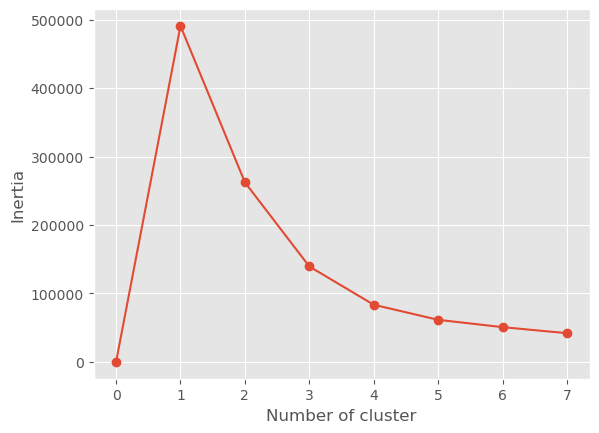

In [26]:
# Inertia
# inertia
inertia_list = np.empty(8)
for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data2)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

In [27]:
# standardization

data3 = df.drop('class', axis=1)

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2 )
pipe = make_pipeline(scalar, kmeans)
pipe.fit(data3)
labels = pipe.predict(data3)
df = pd.DataFrame({'labels': labels, 'class': df['class']})
ct = pd.crosstab(df['labels'], df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0             72       0
1            138     100


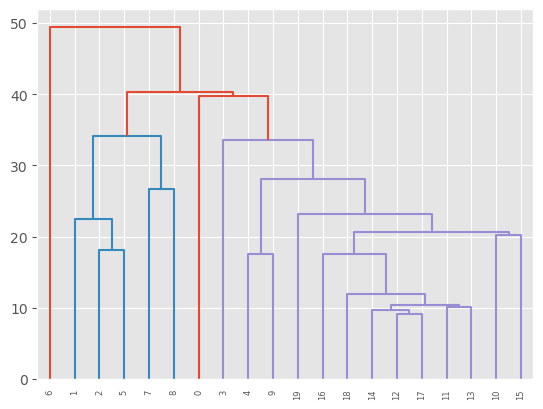

In [29]:
# Hirarcy
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(data.iloc[200:220, :], method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.show()

In [30]:
my_list = [1, 2, 3, 4, 5]
y = map(lambda x: x**2, my_list)
print(list(y))


[1, 4, 9, 16, 25]
